Pre-process and visualizing 17k_artist_with_country_wise_and_global_rank.csv
# Why we don't want to use the 17k records ?
When we check the correlation between the country and popularity we found it's so random and we cannot consider to fill the popularity of the specific country as per the population index.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
nodes = pd.read_csv('/home/manoj/tuhh/data_science_3rd_sem/deep_learning_for_social_analytics/project/deep-learning-for-social-analytics-project/cleaned_datasets/artist_without_country_wise_rank.csv')
edges = pd.read_csv('/home/manoj/tuhh/data_science_3rd_sem/deep_learning_for_social_analytics/project/deep-learning-for-social-analytics-project/cleaned_datasets/artists_collob_data_eng.csv')

In [5]:
nodes_17 = pd.read_csv('/home/manoj/tuhh/data_science_3rd_sem/deep_learning_for_social_analytics/project/deep-learning-for-social-analytics-project/cleaned_datasets/17k_artist_with_country_wise_and_global_rank.csv')


In [6]:
nodes_17.describe()

Unnamed: 0     followers    popularity  Afghanistan  Albania  \
count  17780.000000  1.778000e+04  17780.000000      17780.0  17780.0   
mean    8889.500000  5.798609e+05     41.851744          0.0      0.0   
std     5132.788229  2.679221e+06     19.420642          0.0      0.0   
min        0.000000  0.000000e+00      0.000000          0.0      0.0   
25%     4444.750000  5.896000e+03     30.000000          0.0      0.0   
50%     8889.500000  4.460400e+04     44.000000          0.0      0.0   
75%    13334.250000  2.588210e+05     56.000000          0.0      0.0   
max    17779.000000  1.021569e+08    100.000000          0.0      0.0   

       Algeria       Andorra   Angola  Antigua_and_Barbuda     Argentina  ...  \
count  17780.0  17780.000000  17780.0              17780.0  17780.000000  ...   
mean       0.0      0.014286      0.0                  0.0      0.221991  ...   
std        0.0      0.234584      0.0                  0.0      1.936137  ...   
min        0.0      0.000000      0.0                  0.0      0.000000  ...   
25%        0.0      0.000000      0.0                  0.0      0.000000  ...   
50%        0.0      0.000000      0.0                  0.0      0.000000  ...   
75%        0.0      0.000000      0.0                  0.0      0.000000  ...   
max        0.0     16.000000      0.0                  0.0     91.000000  ...   

            Hip Hop          Jazz         Latin         Metal           Pop  \
count  17780.000000  17780.000000  17780.000000  17780.000000  17780.000000   
mean       0.216535      0.006412      0.017548      0.005456      0.436839   
std        0.411895      0.079818      0.131304      0.073662      0.496009   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         RandB Soul  Reggae Dancehall          Rock    Soundtrack  \
count  17780.000000      17780.000000  17780.000000  17780.000000   
mean       0.045332          0.008774      0.084083      0.004724   
std        0.208037          0.093260      0.277520      0.068574   
min        0.000000          0.000000      0.000000      0.000000   
25%        0.000000          0.000000      0.000000      0.000000   
50%        0.000000          0.000000      0.000000      0.000000   
75%        0.000000          0.000000      0.000000      0.000000   
max        1.000000          1.000000      1.000000      1.000000   

            unknown  
count  17780.000000  
mean       0.346513  
std        0.475872  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000  

[8 rows x 215 columns]

In [7]:
# Identify columns where all the values are 0
zero_columns = nodes_17.columns[(nodes_17 == 0).all()]

# Get the list of column names
zero_column_names = list(zero_columns)

# Get the count of such columns
zero_column_count = len(zero_column_names)

# Output the results
print("Columns with all zero values:", zero_column_names)
print("Number of columns with all zero values:", zero_column_count)

Columns with all zero values: ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua_and_Barbuda', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bosnia_and_Herzegovina', 'Botswana', 'Brunei', 'Burkina_Faso', 'Burundi', 'Cabo_Verde', 'Cambodia', 'Cameroon', 'Central_African_Republic', 'Chad', 'China', 'Comoros', 'Congo_(Congo-Brazzaville)', 'Croatia', 'Cuba', 'Democratic_Republic_of_the_Congo', 'Djibouti', 'Dominica', 'Equatorial_Guinea', 'Eritrea', 'Eswatini_(fmr._"Swaziland")', 'Ethiopia', 'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy_See', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Marshall_Islands', 'Mauritania', 'Mauritius', 'Micronesia', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Mo

In [8]:

# Using the previously computed list of zero-only columns
zero_column_names = ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua_and_Barbuda', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bosnia_and_Herzegovina', 'Botswana', 'Brunei', 'Burkina_Faso', 'Burundi', 'Cabo_Verde', 'Cambodia', 'Cameroon', 'Central_African_Republic', 'Chad', 'China', 'Comoros', 'Congo_(Congo-Brazzaville)', 'Croatia', 'Cuba', 'Democratic_Republic_of_the_Congo', 'Djibouti', 'Dominica', 'Equatorial_Guinea', 'Eritrea', 'Eswatini_(fmr._"Swaziland")', 'Ethiopia', 'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy_See', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Marshall_Islands', 'Mauritania', 'Mauritius', 'Micronesia', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Mozambique', 'Myanmar_(formerly_Burma)', 'Namibia', 'Nauru', 'Nepal', 'Niger', 'Nigeria', 'North_Korea', 'North_Macedonia', 'Oman', 'Pakistan', 'Palau', 'Palestine_State', 'Papua_New_Guinea', 'Qatar', 'Rwanda', 'Saint_Kitts_and_Nevis', 'Saint_Lucia', 'Saint_Vincent_and_the_Grenadines', 'Samoa', 'San_Marino', 'Sao_Tome_and_Principe', 'Senegal', 'Serbia', 'Seychelles', 'Sierra_Leone', 'Slovenia', 'Solomon_Islands', 'Somalia', 'South_Sudan', 'Sri_Lanka', 'Sudan', 'Suriname', 'Syria', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Tonga', 'Trinidad_and_Tobago', 'Tunisia', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Yemen', 'Zambia', 'Zimbabwe', 'Eswatini']

distinct_values = {}

for column in zero_column_names:
    distinct_values[column] = nodes_17[column].unique()
for column, values in distinct_values.items():
    print(f"Distinct values in column '{column}': {values}")

Distinct values in column 'Afghanistan': [0]
Distinct values in column 'Albania': [0]
Distinct values in column 'Algeria': [0]
Distinct values in column 'Angola': [0]
Distinct values in column 'Antigua_and_Barbuda': [0]
Distinct values in column 'Armenia': [0]
Distinct values in column 'Azerbaijan': [0]
Distinct values in column 'Bahamas': [0]
Distinct values in column 'Bahrain': [0]
Distinct values in column 'Bangladesh': [0]
Distinct values in column 'Barbados': [0]
Distinct values in column 'Belarus': [0]
Distinct values in column 'Belize': [0]
Distinct values in column 'Benin': [0]
Distinct values in column 'Bhutan': [0]
Distinct values in column 'Bosnia_and_Herzegovina': [0]
Distinct values in column 'Botswana': [0]
Distinct values in column 'Brunei': [0]
Distinct values in column 'Burkina_Faso': [0]
Distinct values in column 'Burundi': [0]
Distinct values in column 'Cabo_Verde': [0]
Distinct values in column 'Cambodia': [0]
Distinct values in column 'Cameroon': [0]
Distinct value

In [9]:
# Since all these above columns entire record is 0 lets just drop these columns.

nodes_17 = nodes_17.drop(columns=zero_column_names)
print(nodes_17.head())

   Unnamed: 0                name  followers  popularity  Andorra  Argentina  \
0           0           Byklubben     1738.0          24        0          0   
1           1            Kontra K  1999676.0          72        0          0   
2           2               Maxim    34596.0          36        0          0   
3           3  Christopher Martin   249233.0          52        0          0   
4           4       Jakob Hellman    21193.0          39        0          0   

   Australia  Austria  Belgium  Bolivia  ...  Hip Hop  Jazz  Latin  Metal  \
0          0        0        0        0  ...        0     0      0      0   
1          0       44        0        0  ...        1     0      0      0   
2          0        0        0        0  ...        0     0      0      0   
3          0        1        0        0  ...        0     0      0      0   
4          0        0        0        0  ...        0     0      0      0   

   Pop  RandB Soul  Reggae Dancehall  Rock  Soundtrack  

In [10]:
nodes_17.describe()

Unnamed: 0     followers    popularity       Andorra     Argentina  \
count  17780.000000  1.778000e+04  17780.000000  17780.000000  17780.000000   
mean    8889.500000  5.798609e+05     41.851744      0.014286      0.221991   
std     5132.788229  2.679221e+06     19.420642      0.234584      1.936137   
min        0.000000  0.000000e+00      0.000000      0.000000      0.000000   
25%     4444.750000  5.896000e+03     30.000000      0.000000      0.000000   
50%     8889.500000  4.460400e+04     44.000000      0.000000      0.000000   
75%    13334.250000  2.588210e+05     56.000000      0.000000      0.000000   
max    17779.000000  1.021569e+08    100.000000     16.000000     91.000000   

          Australia       Austria       Belgium       Bolivia        Brazil  \
count  17780.000000  17780.000000  17780.000000  17780.000000  17780.000000   
mean       0.272722      0.392745      0.339820      0.175534      0.216817   
std        2.574090      3.100129      2.678771      1.745639      1.946543   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      148.000000    119.000000     99.000000     97.000000     87.000000   

       ...       Hip Hop          Jazz         Latin         Metal  \
count  ...  17780.000000  17780.000000  17780.000000  17780.000000   
mean   ...      0.216535      0.006412      0.017548      0.005456   
std    ...      0.411895      0.079818      0.131304      0.073662   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

                Pop    RandB Soul  Reggae Dancehall          Rock  \
count  17780.000000  17780.000000      17780.000000  17780.000000   
mean       0.436839      0.045332          0.008774      0.084083   
std        0.496009      0.208037          0.093260      0.277520   
min        0.000000      0.000000          0.000000      0.000000   
25%        0.000000      0.000000          0.000000      0.000000   
50%        0.000000      0.000000          0.000000      0.000000   
75%        1.000000      0.000000          0.000000      0.000000   
max        1.000000      1.000000          1.000000      1.000000   

         Soundtrack       unknown  
count  17780.000000  17780.000000  
mean       0.004724      0.346513  
std        0.068574      0.475872  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      1.000000  
max        1.000000      1.000000  

[8 rows x 89 columns]

In [11]:
nodes_17 = nodes_17.drop(columns="Unnamed: 0")
nodes_17.shape

(17780, 89)

In [12]:
nodes_17.head(10)

name  followers  popularity  Andorra  Argentina  Australia  \
0           Byklubben     1738.0          24        0          0          0   
1            Kontra K  1999676.0          72        0          0          0   
2               Maxim    34596.0          36        0          0          0   
3  Christopher Martin   249233.0          52        0          0          0   
4       Jakob Hellman    21193.0          39        0          0          0   
5                Madh    26677.0          19        0          0          0   
6               Juice    11312.0          37        0          0          0   
7              Nehuda    36252.0          31        0          0          0   
8         VovaZiLvova    14619.0          43        0          0          0   
9         Nata Record      188.0          12        0          0          0   

   Austria  Belgium  Bolivia  Brazil  ...  Hip Hop  Jazz  Latin  Metal  Pop  \
0        0        0        0       0  ...        0     0      0      0    0   
1       44        0        0       0  ...        1     0      0      0    0   
2        0        0        0       0  ...        0     0      0      0    0   
3        1        0        0       0  ...        0     0      0      0    0   
4        0        0        0       0  ...        0     0      0      0    1   
5        0        0        0       0  ...        0     0      0      0    0   
6        0        0        0       0  ...        1     0      0      0    1   
7        0        0        0       0  ...        0     0      0      0    0   
8        0        0        0       0  ...        1     0      0      0    1   
9        0        0        0       0  ...        0     0      0      0    0   

   RandB Soul  Reggae Dancehall  Rock  Soundtrack  unknown  
0           0                 0     0           0        1  
1           0                 0     0           0        0  
2           0                 0     0           0        0  
3           0                 1     1           0        1  
4           0                 0     0           0        0  
5           0                 0     0           0        0  
6           0                 0     0           0        1  
7           0                 0     0           0        1  
8           0                 0     1           0        0  
9           0                 0     0           0        0  

[10 rows x 89 columns]

In [13]:
nodes_17.to_csv('17k_artist_with_country_wise_and_global_rank.csv', index=False)

In [14]:
nodes_17.columns

Index(['name', 'followers', 'popularity', 'Andorra', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bolivia', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'Colombia', 'Costa_Rica', 'Cyprus', 'Czechia_(Czech_Republic)',
       'Denmark', 'Dominican_Republic', 'Ecuador', 'Egypt', 'El_Salvador',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Guatemala',
       'Honduras', 'Hungary', 'Iceland', 'Hong_kong', 'India', 'Indonesia',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malaysia', 'Malta', 'Mexico', 'Morocco', 'Netherlands',
       'New_Zealand', 'Nicaragua', 'Norway', 'Panama', 'Paraguay', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia',
       'Saudi_Arabia', 'Singapore', 'Slovakia', 'South_Africa', 'South_Korea',
       'Spain', 'Sweden', 'Switzerland', 'Thailand', 'Taiwan', 'Turkey',
       'Ukraine', 'United_Arab_Emirates', 'United_Kingdom',
       'United_States_of_America', 'Uruguay', 

/tmp/ipykernel_138849/3248621142.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = nodes_17.corr()


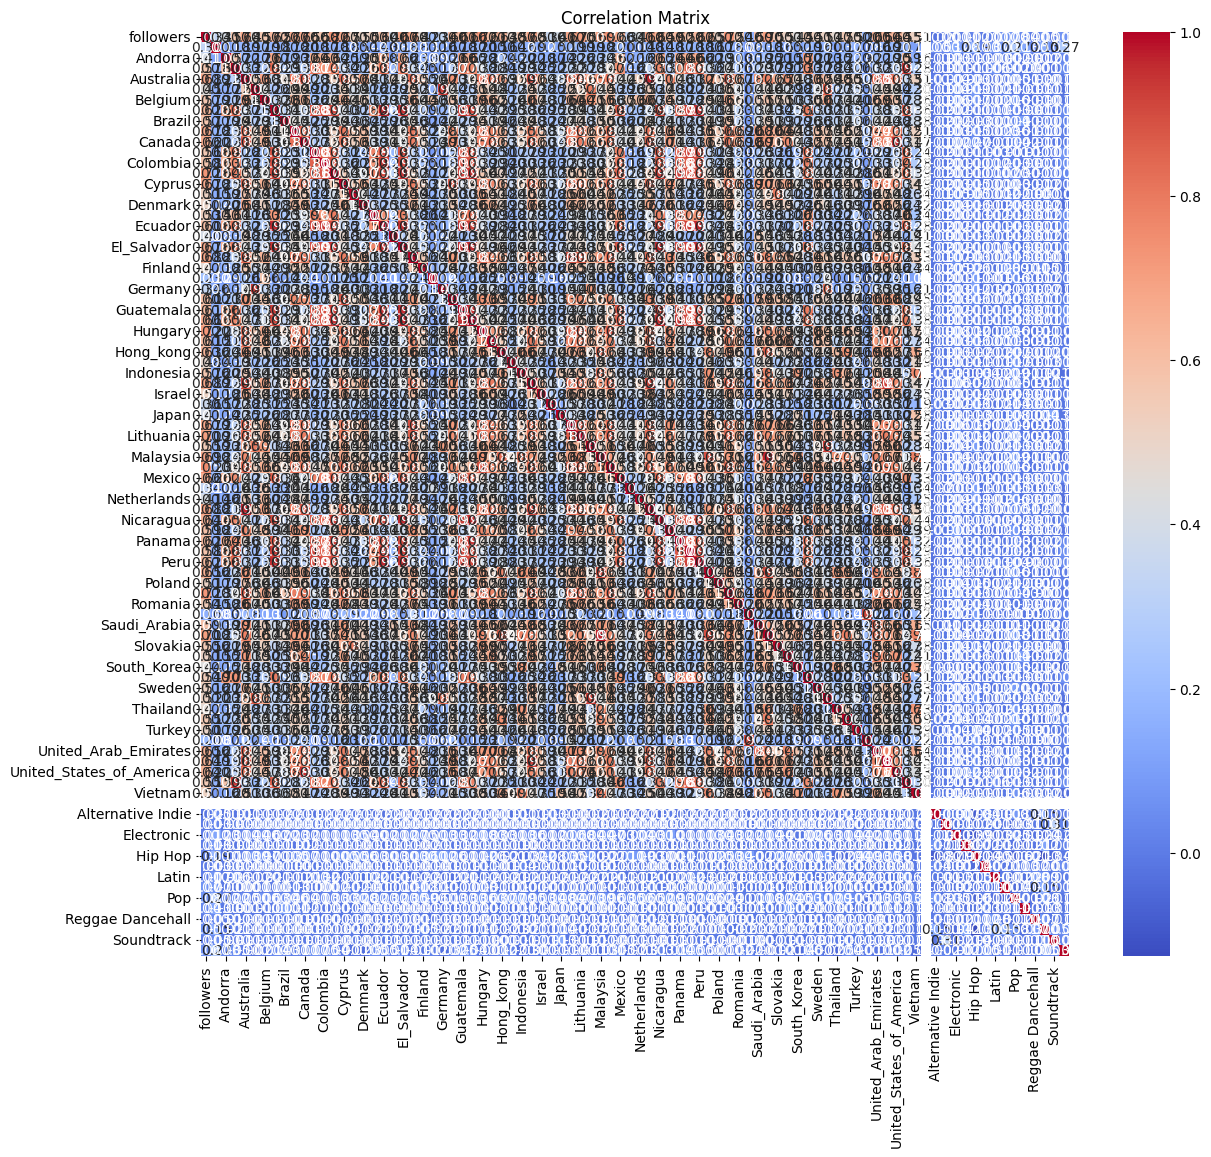

In [16]:
# finding the co-rrelation matric to find the similarity 
correlation_matrix = nodes_17.corr()
#print(correlation_matrix)

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

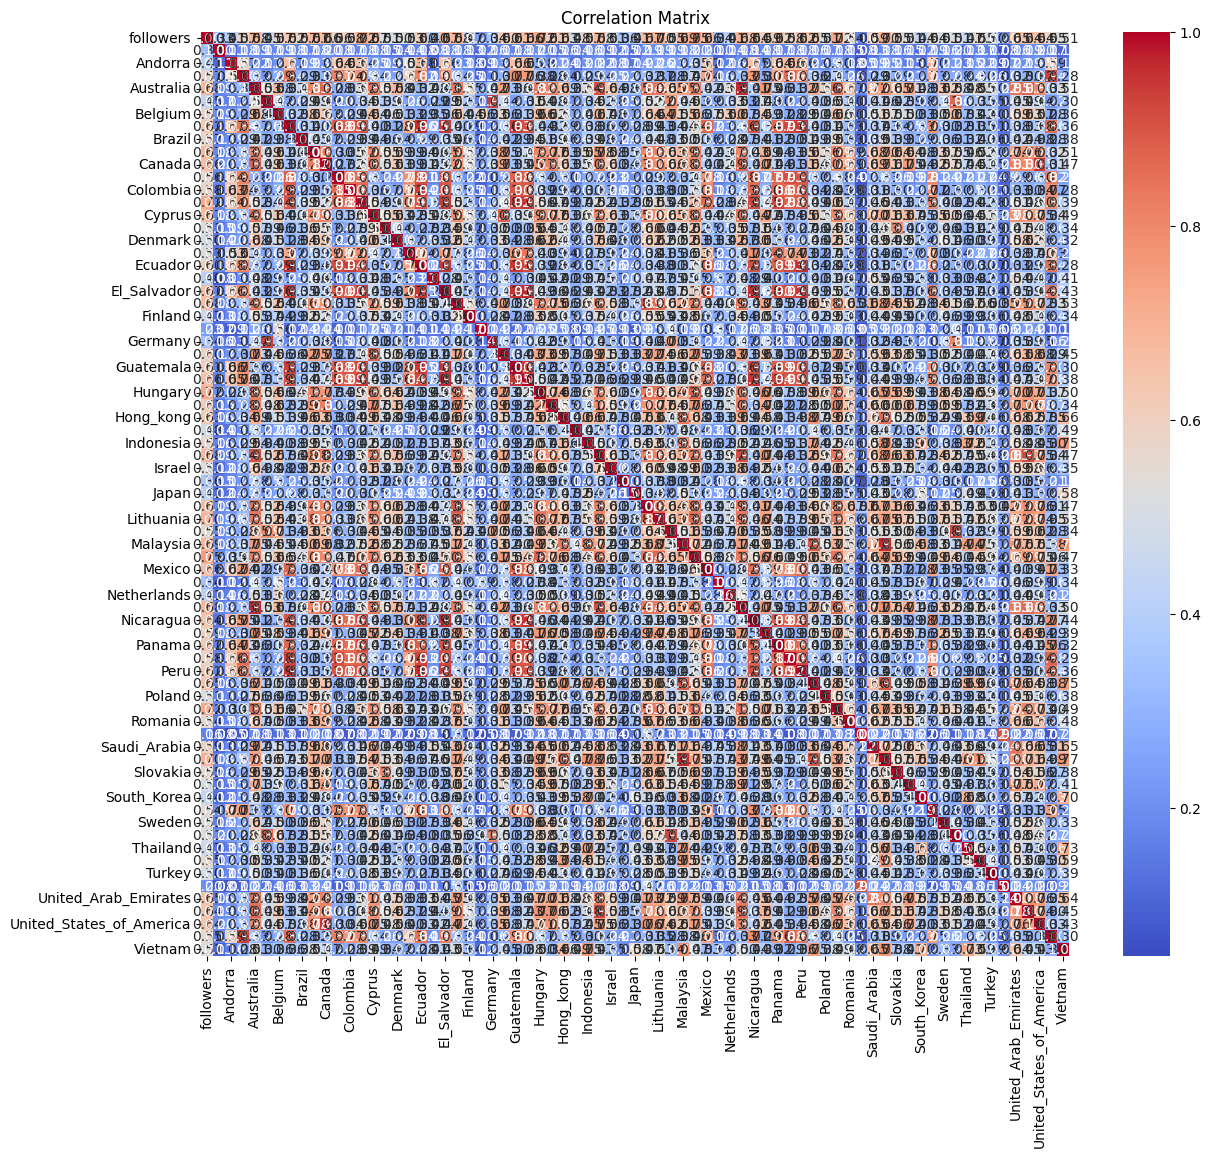

In [17]:
# lets just use the country and followers.
columns = ['followers', 'Andorra', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bolivia', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'Colombia', 'Costa_Rica', 'Cyprus', 'Czechia_(Czech_Republic)',
       'Denmark', 'Dominican_Republic', 'Ecuador', 'Egypt', 'El_Salvador',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Guatemala',
       'Honduras', 'Hungary', 'Iceland', 'Hong_kong', 'India', 'Indonesia',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malaysia', 'Malta', 'Mexico', 'Morocco', 'Netherlands',
       'New_Zealand', 'Nicaragua', 'Norway', 'Panama', 'Paraguay', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia',
       'Saudi_Arabia', 'Singapore', 'Slovakia', 'South_Africa', 'South_Korea',
       'Spain', 'Sweden', 'Switzerland', 'Thailand', 'Taiwan', 'Turkey',
       'Ukraine', 'United_Arab_Emirates', 'United_Kingdom',
       'United_States_of_America', 'Uruguay', 'Vietnam' ]

correlation_matrix = nodes_17[columns].corr()
#print(correlation_matrix)

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

So by this we are not going to use this 17k records and fill the rest of the columns with some mean or standard deviation etc....